In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [79]:
df=pd.read_csv('train.csv')

In [80]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
df.shape

(1460, 81)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [83]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### considering 10% as a minimum missing value percentage threshold and removing everything above it

In [84]:

list_to_drop=list(round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2).values>10].keys())
list_to_drop

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [85]:
df=df.drop(list_to_drop,axis=1)

In [86]:
df.shape

(1460, 75)

### Checking the columns where the missing values between 0-10%

In [87]:
round(100*(df.isnull().sum()/len(df.index)),2)[round(100*(df.isnull().sum()/len(df.index)),2).values>0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

### As we can see that Garagetype ,year build,finsh,qualtiy,condition have equal missing values ie 5.55 this indicates that there can be no garage in these houses so we should impute this value

### First of all we should deal with the Year columns and should replace with the old age

In [88]:
df['YearBuilt_Age'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Age'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Age'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Age'] = df.YrSold.max()-df.YrSold

### Dropping the actual year columns

In [89]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

### Now imputing the missing values

#### Similar to Garage there is a Basement columns having nearly equal missing percentage values ie 2.53 and by looking in the data dictionary there is "NA" where there is no basement so imputing the respective values in them


#### Imputing the values as per the data dictionary values for respective columns

In [90]:
# NP refers to "NOT PRESENT"
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('NP',inplace=True)
df.BsmtCond.fillna('NP',inplace=True)
df.BsmtExposure.fillna('NP',inplace=True)
df.BsmtFinType1.fillna('NP',inplace=True)
df.BsmtFinType2.fillna('NP',inplace=True)
df.GarageType.fillna('NP',inplace=True)
df.GarageYrBlt_Age.fillna(0,inplace=True)
df.GarageFinish.fillna('NP',inplace=True)
df.GarageQual.fillna('NP',inplace=True)
df.GarageCond.fillna('NP',inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)

In [91]:
df.skew()

Id                   0.000000
MSSubClass           1.407657
LotArea             12.207688
OverallQual          0.216944
OverallCond          0.693067
MasVnrArea           2.676412
BsmtFinSF1           1.685503
BsmtFinSF2           4.255261
BsmtUnfSF            0.920268
TotalBsmtSF          1.524255
1stFlrSF             1.376757
2ndFlrSF             0.813030
LowQualFinSF         9.011341
GrLivArea            1.366560
BsmtFullBath         0.596067
BsmtHalfBath         4.103403
FullBath             0.036562
HalfBath             0.675897
BedroomAbvGr         0.211790
KitchenAbvGr         4.488397
TotRmsAbvGrd         0.676341
Fireplaces           0.649565
GarageCars          -0.342549
GarageArea           0.179981
WoodDeckSF           1.541376
OpenPorchSF          2.364342
EnclosedPorch        3.089872
3SsnPorch           10.304342
ScreenPorch          4.122214
PoolArea            14.828374
MiscVal             24.476794
MoSold               0.212053
SalePrice            1.882876
YearBuilt_

In [92]:
p_cat=df.columns[df.dtypes.values=='object']

In [93]:
for i in p_cat:
    print(df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

### By looking the above data we can see that "Street" and "Utilities" are highly skewed so lets just remove these two columns


In [94]:
df=df.drop(['Street','Utilities'],axis=1)

### ID column is also of no use so dropping it

In [95]:
df= df.drop('Id',axis=1)

## EDA

### plotting the graphs for numerical columns with SalePrice of Houses

In [96]:
p=df.columns[df.dtypes.values!='object']

In [97]:
p=p.drop('SalePrice')

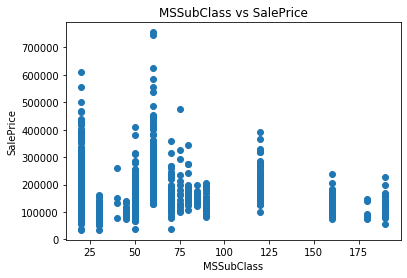

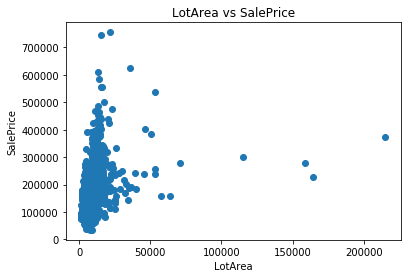

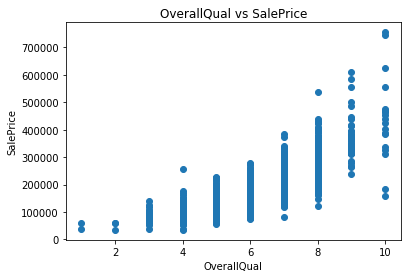

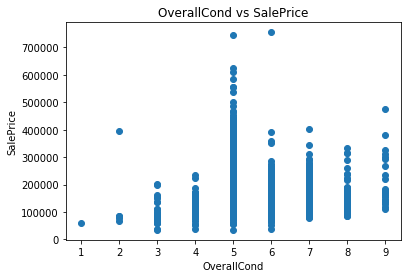

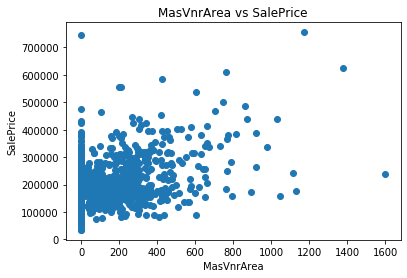

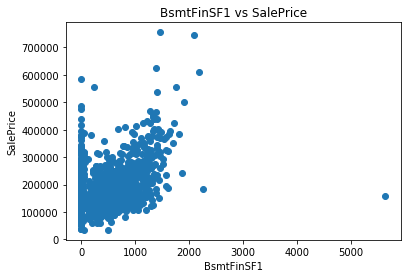

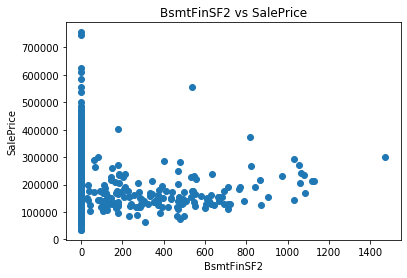

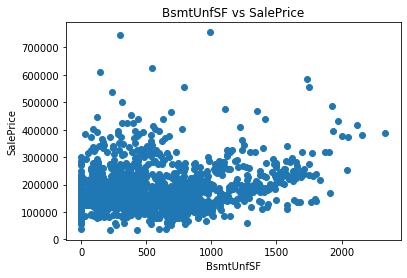

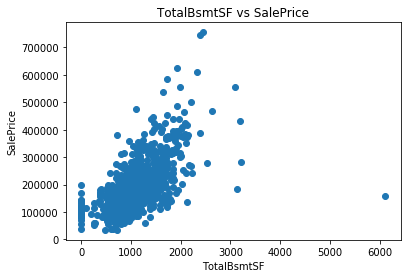

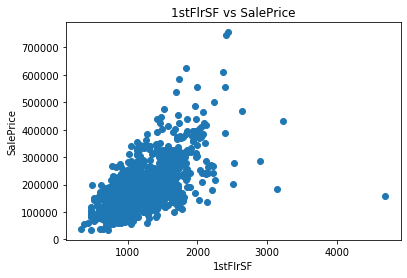

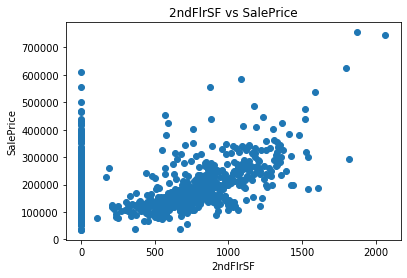

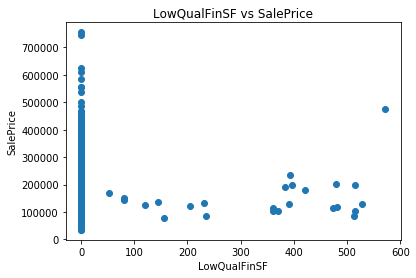

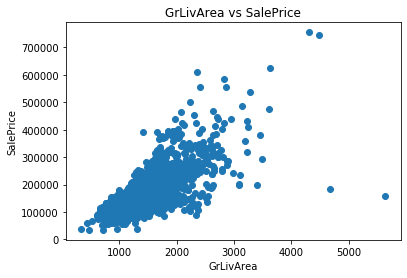

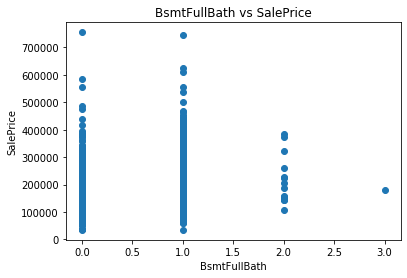

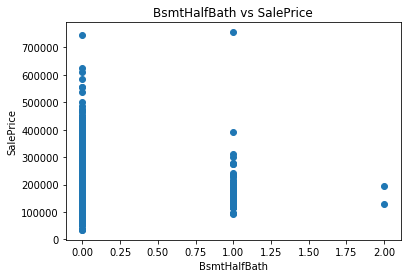

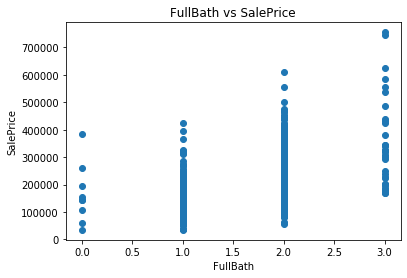

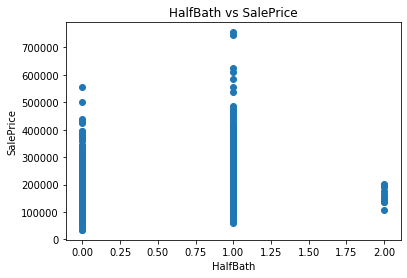

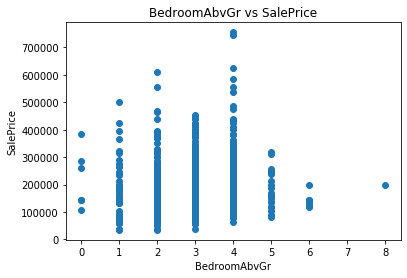

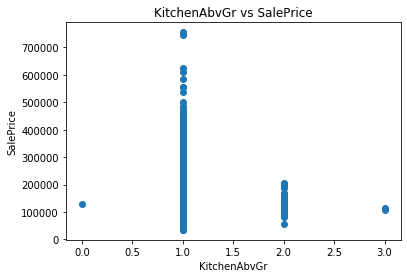

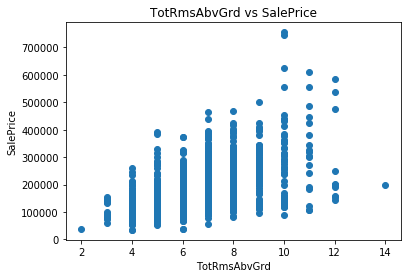

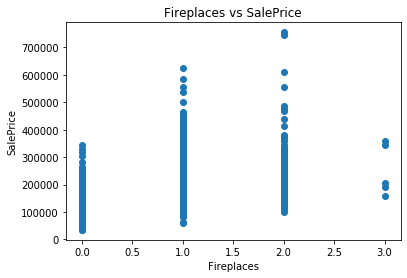

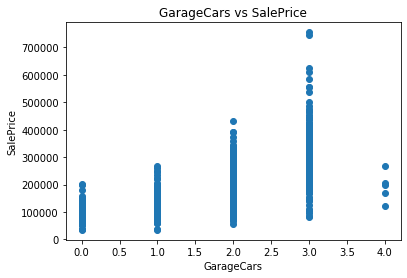

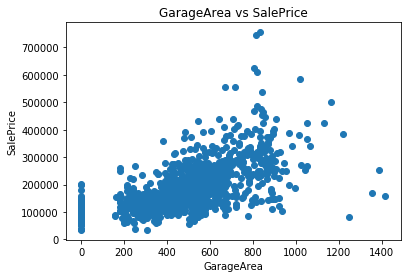

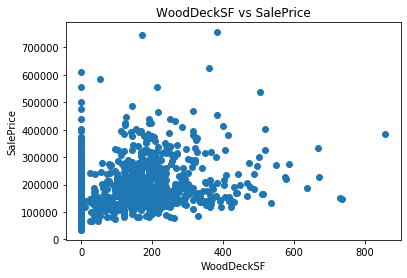

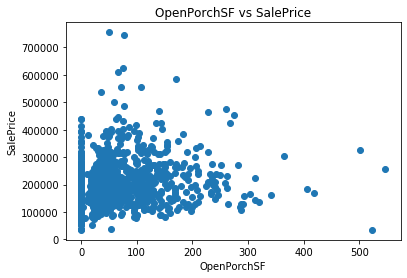

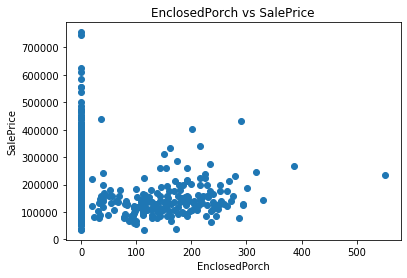

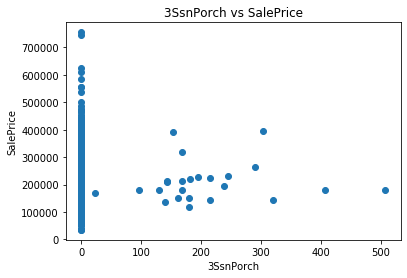

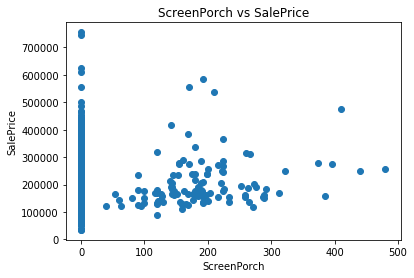

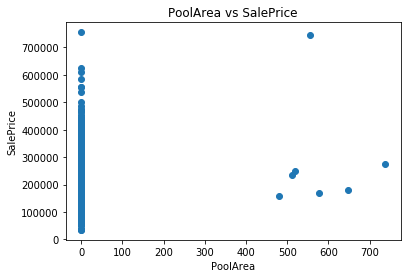

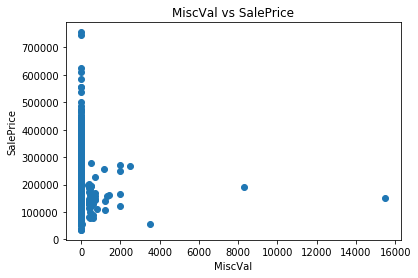

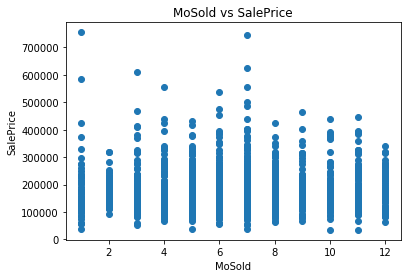

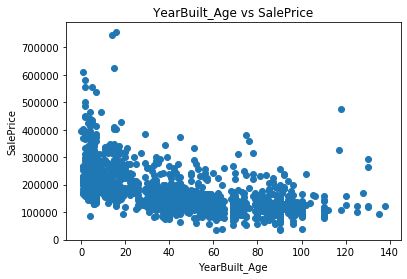

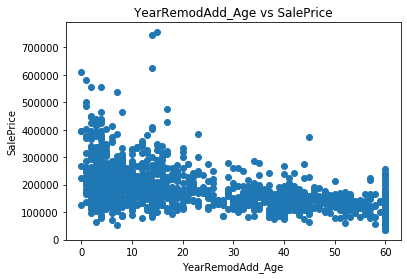

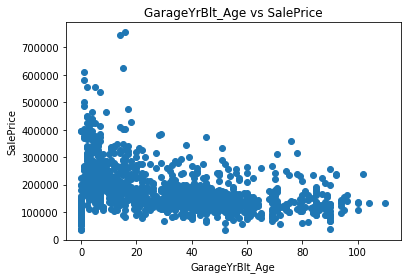

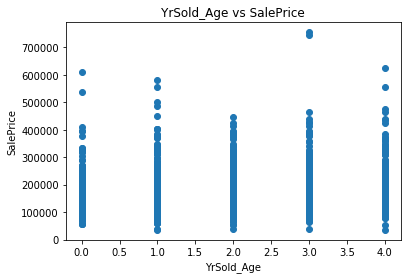

In [98]:
for i in p:
    figure=plt.figure()
    plt.scatter(df[i],df['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title("{} vs SalePrice".format(i))
    plt.show()

### By looking at the above scatter plots , it is observed that many numerical columns are actually categorical columns containing discrete values,where as actual numerical columns are:
### LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,GarageArea,GrLivArea,WoodDeckSF,etc

#### Lets also plot heatmap to check the correllations

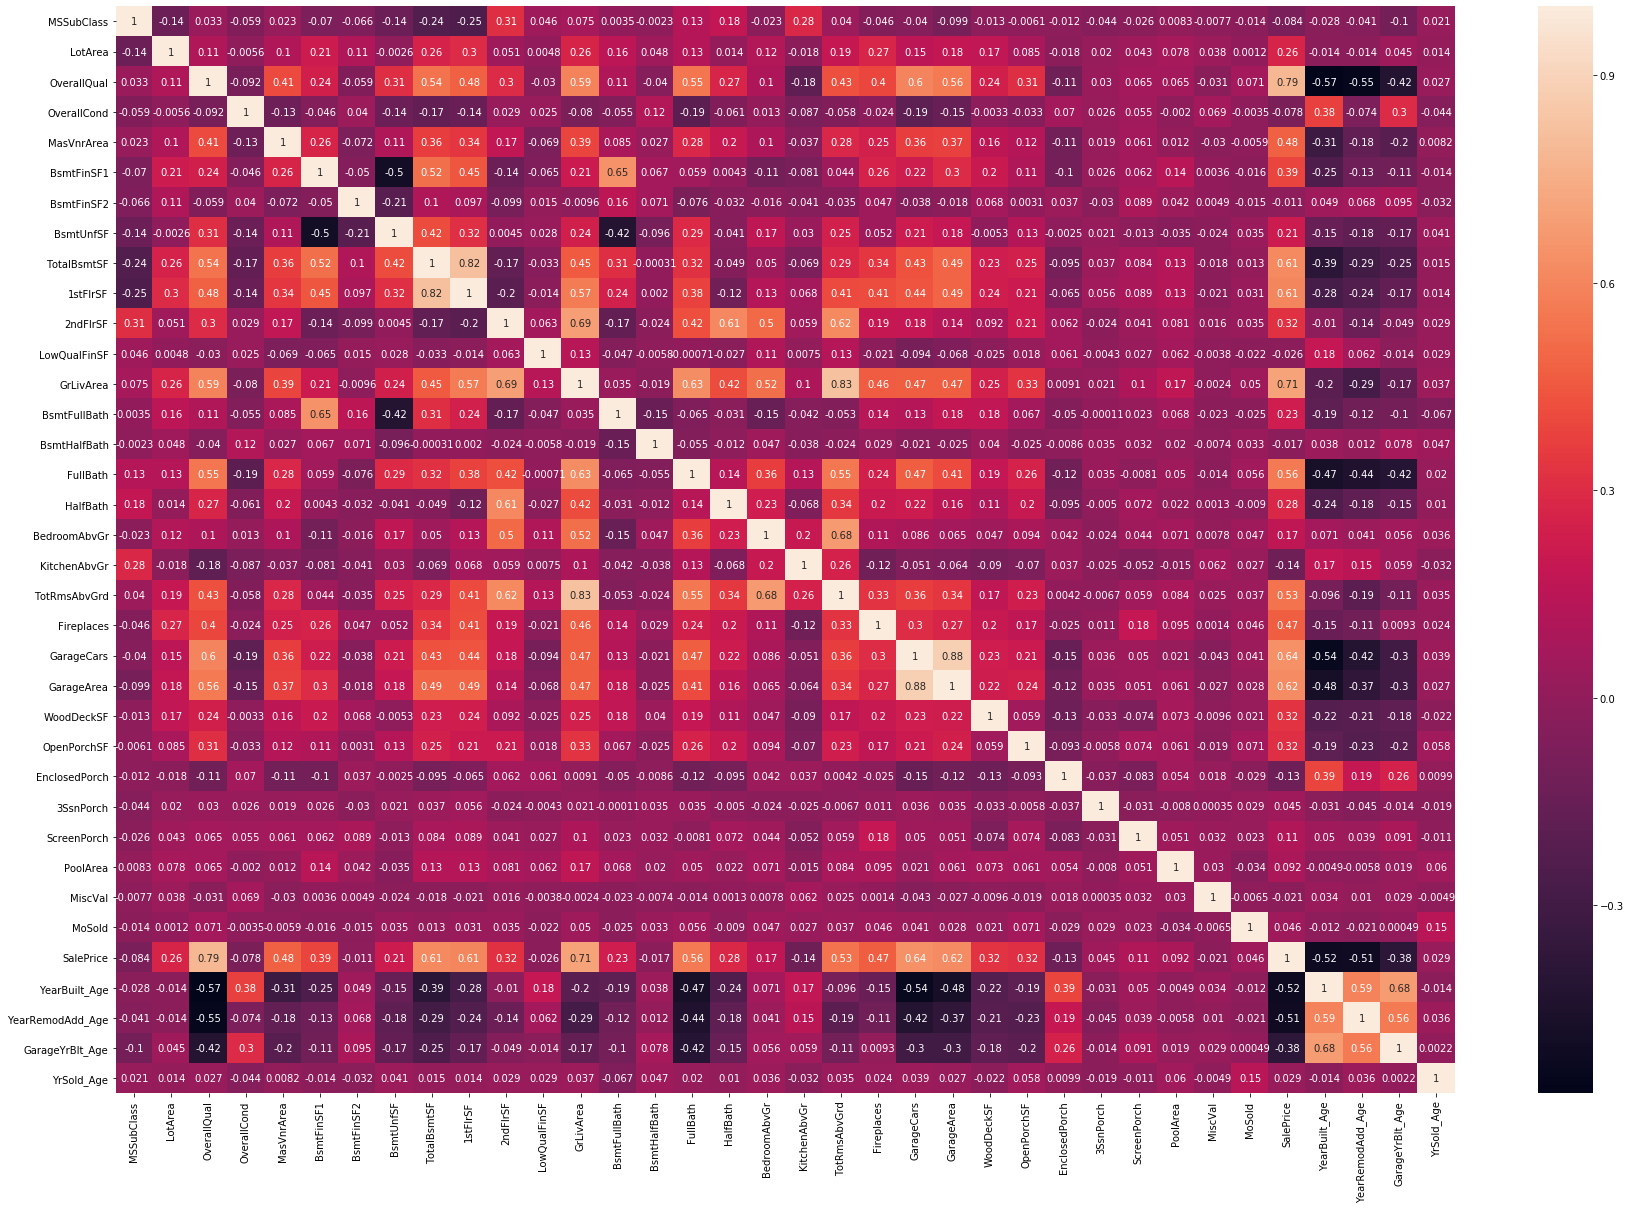

In [99]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### By plotting the correllation matrix we see that "GrLiveArea" is highly correllated with "TotRmsAbvGrd" as well as TotalBsmtSf is also corr so lets drop both. Note: we are ignoring the correllations of SalePrice as it is our target variable

In [100]:
df=df.drop('GrLivArea',axis=1)
df=df.drop('TotalBsmtSF',axis=1)

### Now lets plot the categorical variables with SalePrice

In [101]:
p=df.columns[df.dtypes.values=='object']

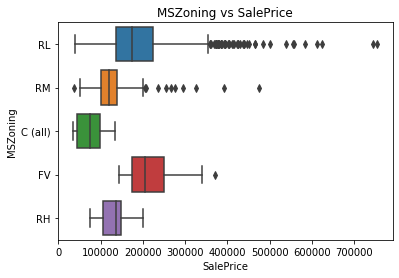

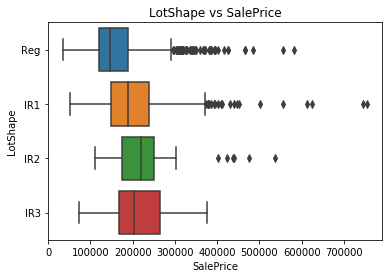

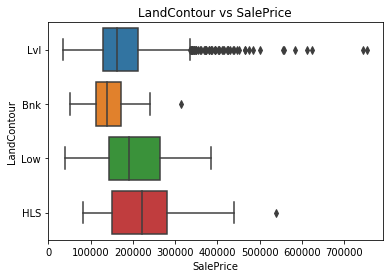

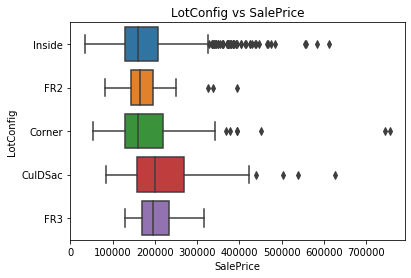

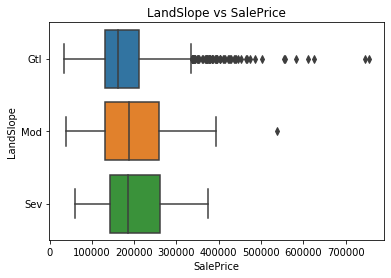

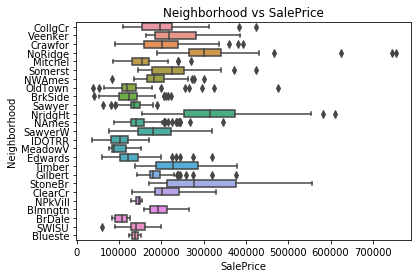

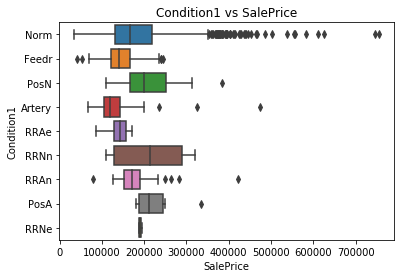

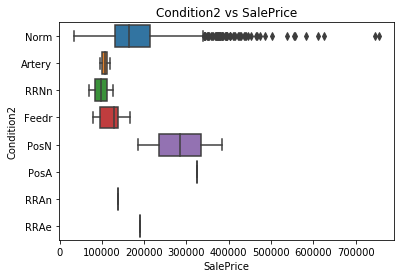

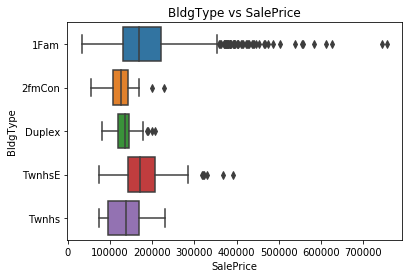

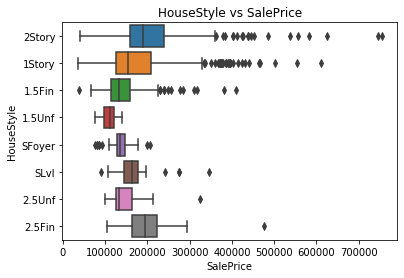

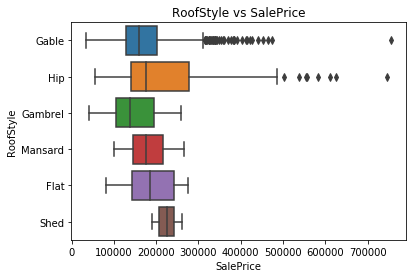

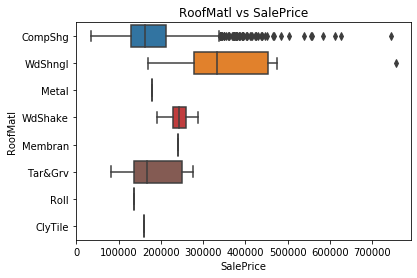

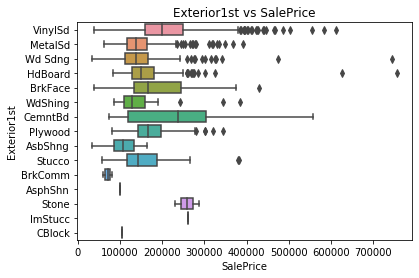

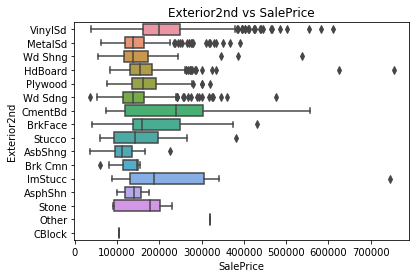

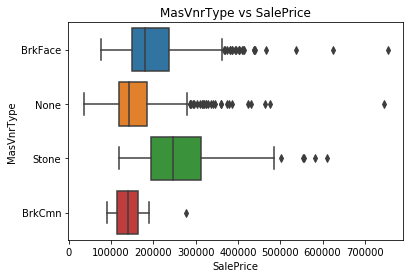

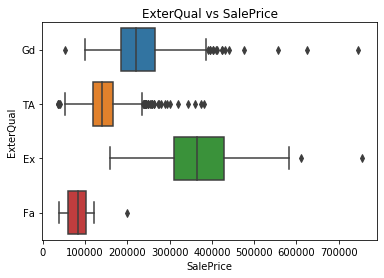

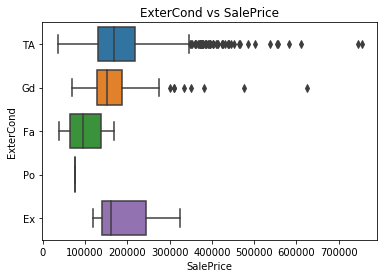

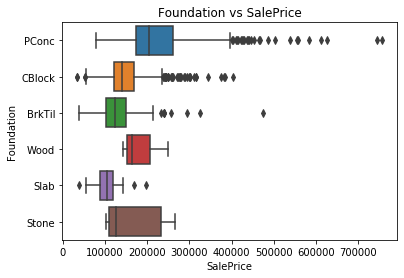

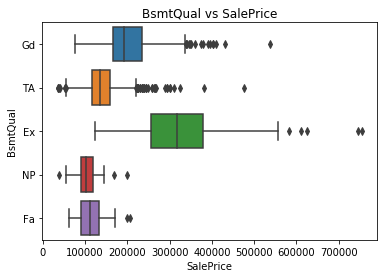

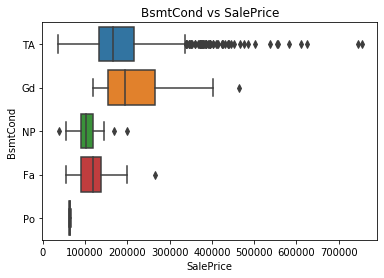

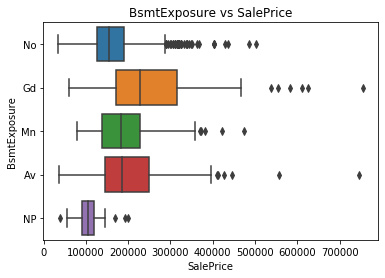

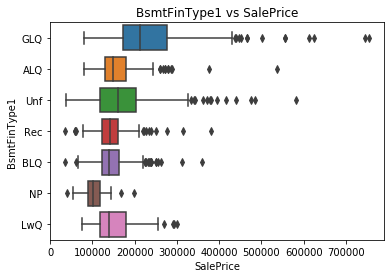

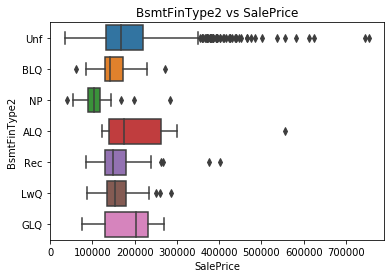

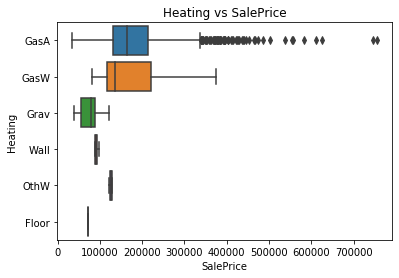

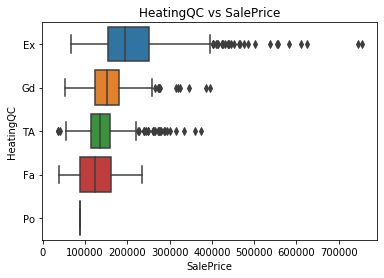

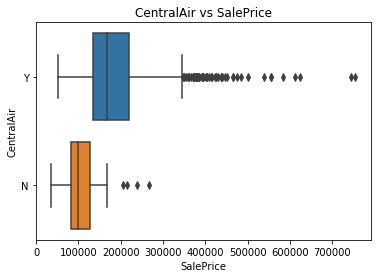

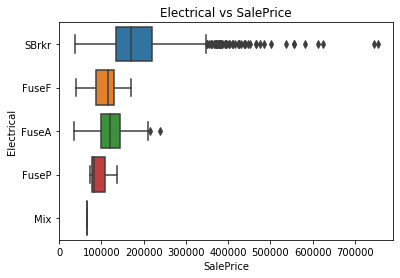

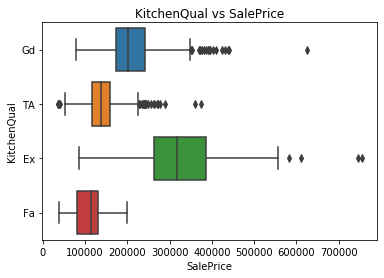

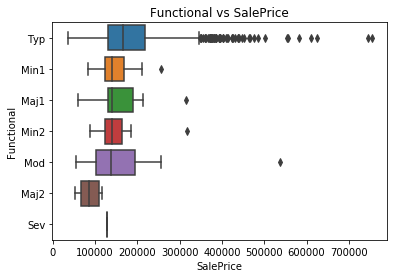

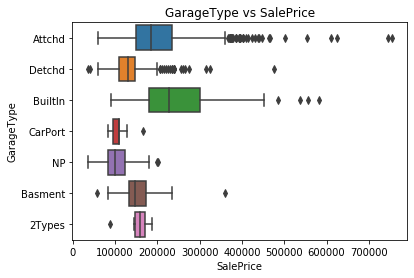

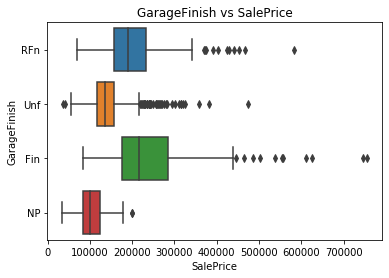

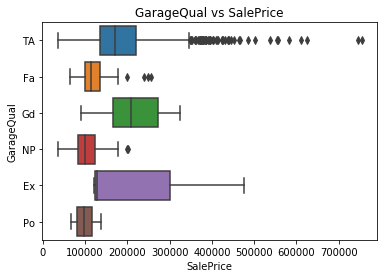

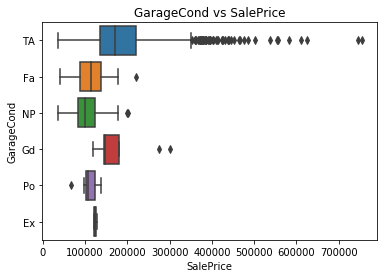

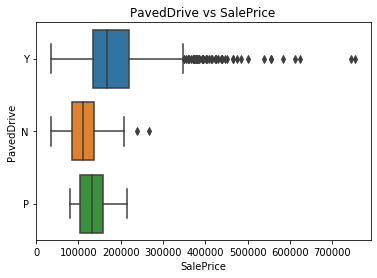

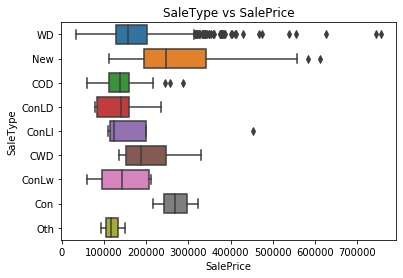

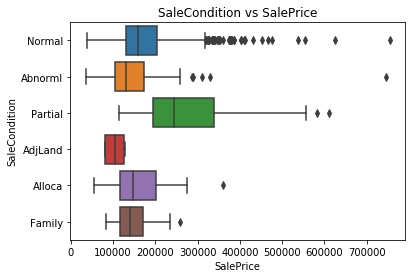

In [102]:
for i in p:
    figure=plt.figure()
    sns.boxplot(x = 'SalePrice', y =i, data = df)
    plt.ylabel(i)
    plt.xlabel('SalePrice')
    plt.title("{} vs SalePrice".format(i))
    plt.show()

### Lets check the distribution of our target varibale SalePrice

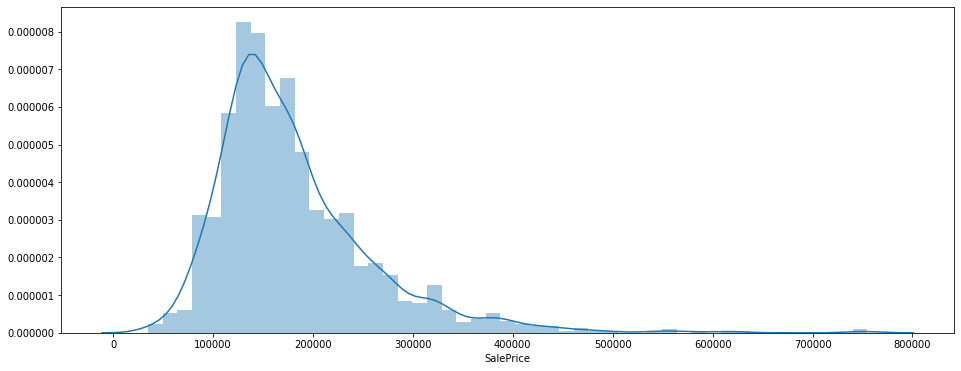

In [103]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

### As we see that it is not normally distributed so lets apply log function on SalePrice

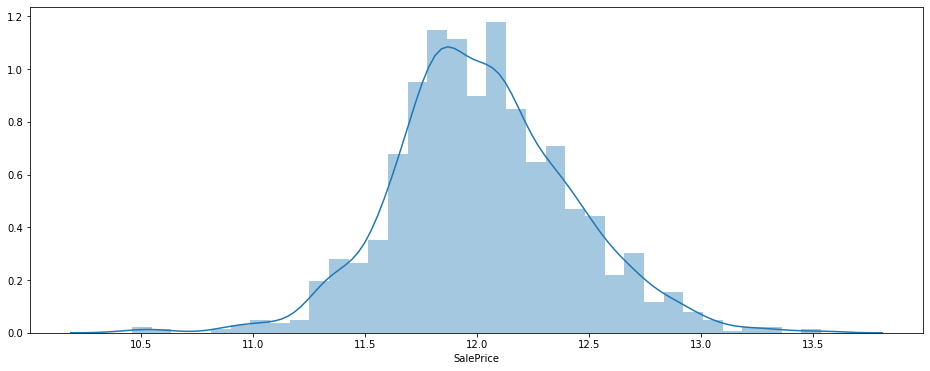

In [104]:
plt.figure(figsize=(16,6))
sns.distplot(np.log(df.SalePrice))
plt.show()

In [105]:
df['SalePrice']=df['SalePrice'].apply(lambda x:np.log(x))

### Creating Dummy Variables

In [106]:
#we already have list of categorical columns ie p
dummy= pd.get_dummies(df[p],drop_first=True)
df= pd.concat([df,dummy],axis=1)
df = df.drop(p,axis='columns')

In [107]:
y=df.pop('SalePrice')
X=df

In [108]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [109]:
#getting names of all columns except the dummy columns
for i in X_train.columns:
    print(i)

MSSubClass
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YearBuilt_Age
YearRemodAdd_Age
GarageYrBlt_Age
YrSold_Age
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborh

In [110]:
num_col=['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YearBuilt_Age','YearRemodAdd_Age','GarageYrBlt_Age','YrSold_Age']

In [111]:
scaler=StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])


### Doing Lasso regression first 

In [112]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072497,3.203584e-02,0.001001,3.568323e-07,0.0001,{'alpha': 0.0001},0.904159,0.547319,0.863571,0.895462,...,0.807230,0.132808,3,0.936650,0.956571,0.944687,0.938986,0.941787,0.943736,0.006960
1,0.012411,4.321735e-03,0.001001,3.504023e-07,0.001,{'alpha': 0.001},0.893878,0.568172,0.887276,0.902081,...,0.815999,0.126550,1,0.899829,0.935418,0.899802,0.901498,0.905985,0.908506,0.013644
2,0.005805,4.004003e-04,0.001001,2.431402e-07,0.01,{'alpha': 0.01},0.873565,0.602819,0.860183,0.863177,...,0.810642,0.104056,2,0.847419,0.897823,0.844330,0.846448,0.852660,0.857736,0.020230
3,0.005005,2.431402e-07,0.001001,4.156970e-07,0.05,{'alpha': 0.05},0.791693,0.705046,0.752498,0.767942,...,0.760488,0.030898,4,0.765147,0.807448,0.763609,0.774828,0.772342,0.776675,0.015955
4,0.005005,2.431402e-07,0.000601,4.903297e-04,0.1,{'alpha': 0.1},0.672966,0.658590,0.624163,0.642640,...,0.650676,0.016408,5,0.647054,0.680218,0.646826,0.657043,0.661917,0.658611,0.012270
5,0.004404,4.905244e-04,0.001001,1.168008e-07,0.2,{'alpha': 0.2},0.396016,0.423790,0.353465,0.403576,...,0.396597,0.023398,6,0.388035,0.396745,0.373267,0.420256,0.424991,0.400659,0.019499
6,0.004204,4.002333e-04,0.001001,9.536743e-08,0.3,{'alpha': 0.3},0.056817,0.058024,0.009896,0.104458,...,0.069712,0.038867,7,0.064951,0.052586,0.024020,0.110183,0.128647,0.076077,0.038242
7,0.004204,4.005195e-04,0.000801,4.002810e-04,0.4,{'alpha': 0.4},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.004004,1.784161e-07,0.001001,1.784161e-07,0.5,{'alpha': 0.5},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.004003,1.507891e-07,0.001001,2.336015e-07,0.6,{'alpha': 0.6},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


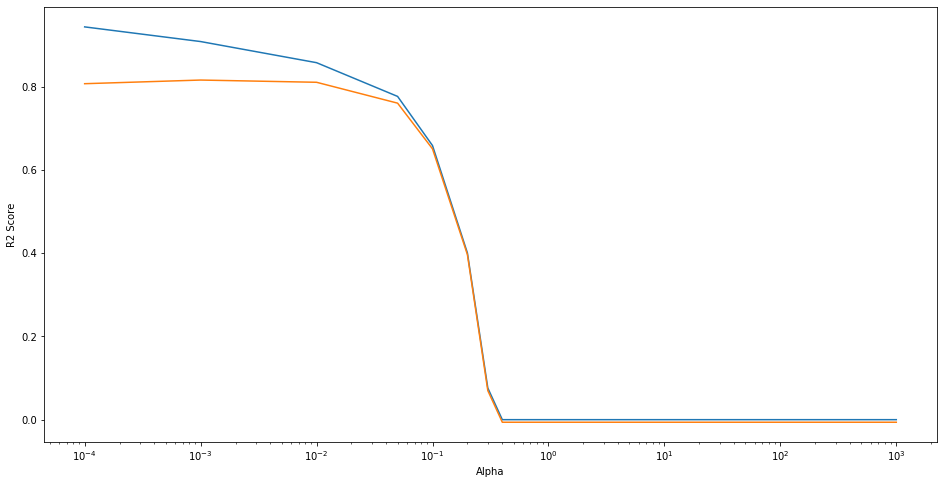

In [114]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [115]:
model_cv.best_params_

{'alpha': 0.001}

In [116]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8999581261590586
0.891740770743607


In [117]:
lasso.coef_

array([-0.02685206,  0.01584603,  0.0946353 ,  0.04120115, -0.00251083,
       -0.        ,  0.00425718,  0.00590381,  0.05993453,  0.07529742,
        0.0084452 ,  0.03225126,  0.00428113,  0.01863024,  0.01454004,
        0.00751282, -0.00787513,  0.02816344,  0.02717457,  0.05719817,
        0.00181022,  0.01606757, -0.00093626,  0.01005128,  0.00744113,
        0.01761602, -0.01013514, -0.00255341,  0.00353882, -0.04902041,
       -0.02549953,  0.00631538,  0.00298074,  0.        , -0.        ,
        0.00127778, -0.05136704,  0.        , -0.02588353, -0.        ,
        0.01786103,  0.        ,  0.01086944,  0.0390091 , -0.        ,
       -0.        , -0.0010178 ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.01821819,  0.01592342, -0.        ,  0.08971541,
       -0.03513699, -0.00927947, -0.        , -0.        , -0.        ,
       -0.00206187, -0.        , -0.        ,  0.03015959,  0.07992621,
       -0.        , -0.        ,  0.        , -0.        ,  0.04

In [118]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.835),
 ('MSSubClass', -0.027),
 ('LotArea', 0.016),
 ('OverallQual', 0.095),
 ('OverallCond', 0.041),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.004),
 ('BsmtUnfSF', 0.006),
 ('1stFlrSF', 0.06),
 ('2ndFlrSF', 0.075),
 ('LowQualFinSF', 0.008),
 ('BsmtFullBath', 0.032),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.019),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', -0.008),
 ('TotRmsAbvGrd', 0.028),
 ('Fireplaces', 0.027),
 ('GarageCars', 0.057),
 ('GarageArea', 0.002),
 ('WoodDeckSF', 0.016),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.018),
 ('PoolArea', -0.01),
 ('MiscVal', -0.003),
 ('MoSold', 0.004),
 ('YearBuilt_Age', -0.049),
 ('YearRemodAdd_Age', -0.025),
 ('GarageYrBlt_Age', 0.006),
 ('YrSold_Age', 0.003),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.001),
 ('MSZoning_RM', -0.051),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.026),
 ('LotShape_Reg', -0.

In [119]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols=cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient']


In [120]:
lasso_coef['Coefficient']=lasso_coef['Coefficient'].apply(lambda x :abs(x))

In [121]:
lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
0,const,11.835274
71,Neighborhood_StoneBr,0.107451
3,OverallQual,0.094635
55,Neighborhood_Crawfor,0.089715
114,Exterior1st_BrkFace,0.084488
65,Neighborhood_NridgHt,0.079926
10,2ndFlrSF,0.075297
9,1stFlrSF,0.059935
20,GarageCars,0.057198
75,Condition1_Norm,0.056147


### Ridgre Regression

In [122]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [123]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006706,0.000459,0.001001,3.544347e-07,0.0001,{'alpha': 0.0001},0.837565,0.890507,0.364279,0.898814,...,0.946538,0.945354,0.949803,0.945366,0.950933,0.954516,0.950763,0.947844,0.948701,0.002710
1,0.006606,0.000490,0.000901,3.002009e-04,0.0010,{'alpha': 0.001},0.838879,0.890439,0.380485,0.899611,...,0.946535,0.945348,0.949798,0.945366,0.950930,0.954511,0.950756,0.947838,0.948696,0.002710
2,0.005805,0.000400,0.001001,1.168008e-07,0.0100,{'alpha': 0.01},0.848686,0.889449,0.509646,0.905484,...,0.946270,0.944926,0.949414,0.945341,0.950648,0.954137,0.950239,0.947437,0.948351,0.002665
3,0.006306,0.000901,0.000917,5.133427e-04,0.0500,{'alpha': 0.05},0.864696,0.884506,0.750531,0.914921,...,0.943664,0.941528,0.946257,0.945122,0.948104,0.950890,0.946257,0.944189,0.945479,0.002464
4,0.005906,0.000539,0.001001,1.668930e-07,0.1000,{'alpha': 0.1},0.871188,0.880649,0.834504,0.919074,...,0.940845,0.938414,0.943312,0.944850,0.945501,0.947773,0.942749,0.941236,0.942762,0.002564
5,0.005806,0.000400,0.001001,2.622604e-07,0.2000,{'alpha': 0.2},0.877921,0.876795,0.878674,0.924078,...,0.937367,0.934860,0.939919,0.944342,0.942307,0.944235,0.938835,0.937973,0.939614,0.002941
6,0.005906,0.000300,0.001001,1.168008e-07,0.3000,{'alpha': 0.3},0.882306,0.874885,0.890521,0.927697,...,0.935295,0.932763,0.937907,0.943852,0.940363,0.942226,0.936548,0.936152,0.937756,0.003223
7,0.006906,0.000539,0.001001,2.489163e-07,0.4000,{'alpha': 0.4},0.885518,0.873760,0.895238,0.930508,...,0.933863,0.931282,0.936481,0.943377,0.938990,0.940863,0.934935,0.934929,0.936450,0.003421
8,0.006306,0.001006,0.001001,1.846782e-07,0.5000,{'alpha': 0.5},0.887973,0.873041,0.897599,0.932747,...,0.932776,0.930129,0.935367,0.942922,0.937929,0.939842,0.933683,0.934013,0.935439,0.003567
9,0.006106,0.000300,0.000901,3.001690e-04,0.6000,{'alpha': 0.6},0.889904,0.872564,0.898984,0.934564,...,0.931899,0.929179,0.934445,0.942488,0.937064,0.939026,0.932655,0.933281,0.934610,0.003679


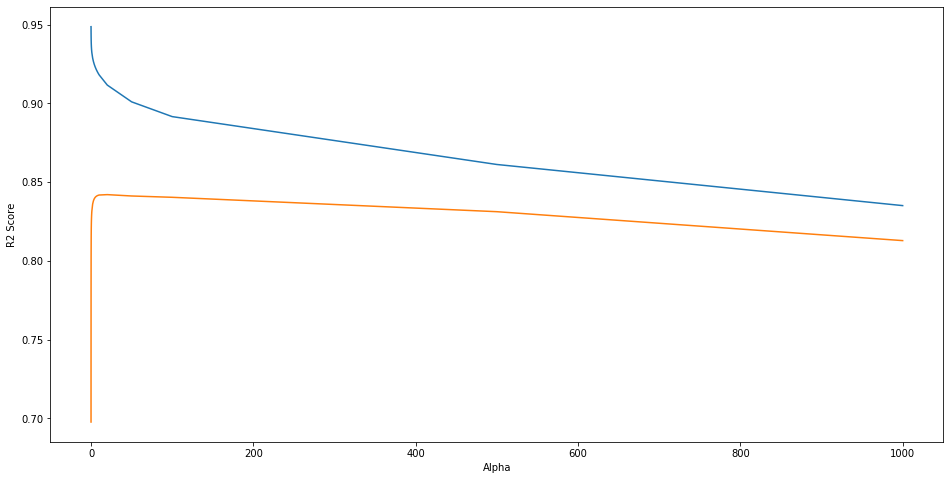

In [124]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('R2 Score')
plt.show()

In [125]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20}

In [126]:
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9100829277542349
0.8927770487030304


In [129]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols=cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coefficient']

In [130]:
ridge_coef['Coefficient']=ridge_coef['Coefficient'].apply(lambda x :abs(x))

In [131]:
ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
0,constant,11.808942
3,OverallQual,0.088127
10,2ndFlrSF,0.071850
71,Neighborhood_StoneBr,0.068427
55,Neighborhood_Crawfor,0.068188
114,Exterior1st_BrkFace,0.062879
9,1stFlrSF,0.058595
65,Neighborhood_NridgHt,0.053965
75,Condition1_Norm,0.050698
202,Functional_Typ,0.050652


# Subjective Questions

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Answer

From above we can conclude that Lasso regression is better than Ridge regression as it also does feature elimination and makes the overall model simpler.

### Doubling the alpha and evaluating

#### Lasso Regression

In [132]:
#building the model
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8867781291902275
0.8854490439499599


In [133]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.896),
 ('MSSubClass', -0.025),
 ('LotArea', 0.016),
 ('OverallQual', 0.109),
 ('OverallCond', 0.04),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.001),
 ('1stFlrSF', 0.067),
 ('2ndFlrSF', 0.067),
 ('LowQualFinSF', 0.007),
 ('BsmtFullBath', 0.032),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.016),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.008),
 ('TotRmsAbvGrd', 0.028),
 ('Fireplaces', 0.028),
 ('GarageCars', 0.06),
 ('GarageArea', 0.004),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.011),
 ('MiscVal', -0.001),
 ('MoSold', 0.003),
 ('YearBuilt_Age', -0.046),
 ('YearRemodAdd_Age', -0.024),
 ('GarageYrBlt_Age', 0.004),
 ('YrSold_Age', 0.002),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.056),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('Lan

In [134]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient']

In [135]:
lasso_coef['Coefficient']=lasso_coef['Coefficient'].apply(lambda x :abs(x))

In [136]:
#Extracting top 10 coefficient
lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Featuere,Coefficient
0,const,11.895641
3,OverallQual,0.109049
10,2ndFlrSF,0.066971
9,1stFlrSF,0.066962
20,GarageCars,0.059945
37,MSZoning_RM,0.055523
55,Neighborhood_Crawfor,0.053281
75,Condition1_Norm,0.051178
114,Exterior1st_BrkFace,0.049545
30,YearBuilt_Age,0.046262


#### Ridge Regression 

In [137]:
#printing the r2score for train and test
ridge = Ridge(alpha = 40)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.902601784568122
0.8917520223539863


In [138]:
#checking the model parameters
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coefficient']

In [139]:
ridge_coef['Coefficient']=ridge_coef['Coefficient'].apply(lambda x :abs(x))

In [140]:
#printing the coefficient
ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
0,constant,11.863700
3,OverallQual,0.090310
10,2ndFlrSF,0.061026
9,1stFlrSF,0.052205
55,Neighborhood_Crawfor,0.050153
114,Exterior1st_BrkFace,0.046533
20,GarageCars,0.045900
75,Condition1_Norm,0.044510
71,Neighborhood_StoneBr,0.043872
65,Neighborhood_NridgHt,0.040025


## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Answer

In [141]:
X_train.drop('Neighborhood_StoneBr',axis=1,inplace=True)
X_train.drop('OverallQual',axis=1,inplace=True)
X_train.drop('Neighborhood_Crawfor',axis=1,inplace=True)
X_train.drop('Exterior1st_BrkFace',axis=1,inplace=True)
X_train.drop('Neighborhood_NridgHt',axis=1,inplace=True)
X_test.drop('Neighborhood_StoneBr',axis=1,inplace=True)
X_test.drop('OverallQual',axis=1,inplace=True)
X_test.drop('Neighborhood_Crawfor',axis=1,inplace=True)
X_test.drop('Exterior1st_BrkFace',axis=1,inplace=True)
X_test.drop('Neighborhood_NridgHt',axis=1,inplace=True)

In [142]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [143]:
#check result of lasso regression
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059054,1.137692e-02,0.001001,5.001110e-07,0.0001,{'alpha': 0.0001},0.894944,0.493196,0.841755,0.885322,...,0.783638,0.148841,1,0.932078,0.952656,0.940270,0.933353,0.936421,0.938955,0.007410
1,0.013012,5.518288e-03,0.000802,4.010137e-04,0.001,{'alpha': 0.001},0.883191,0.487865,0.866152,0.866853,...,0.779293,0.149023,2,0.881846,0.926457,0.884920,0.886198,0.888575,0.893599,0.016572
2,0.006003,7.914060e-06,0.001004,4.303175e-06,0.01,{'alpha': 0.01},0.849784,0.516376,0.841597,0.839190,...,0.773818,0.128966,3,0.821853,0.880877,0.818617,0.821725,0.827760,0.834166,0.023542
3,0.005602,4.875563e-04,0.001001,2.780415e-07,0.05,{'alpha': 0.05},0.741964,0.613477,0.710810,0.724414,...,0.709439,0.050375,4,0.715968,0.782572,0.713066,0.726986,0.726489,0.733016,0.025391
4,0.004604,4.905634e-04,0.001001,3.234067e-07,0.1,{'alpha': 0.1},0.611494,0.567543,0.555417,0.597681,...,0.593352,0.028799,5,0.593308,0.628033,0.580492,0.608001,0.607606,0.603488,0.015952
5,0.004406,4.889965e-04,0.000601,4.903686e-04,0.2,{'alpha': 0.2},0.207179,0.215280,0.172167,0.217938,...,0.210581,0.022125,6,0.193887,0.218047,0.199340,0.236624,0.227730,0.215125,0.016309
6,0.004006,3.362970e-06,0.001001,1.784161e-07,0.3,{'alpha': 0.3},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.004006,5.965993e-06,0.001000,5.341002e-06,0.4,{'alpha': 0.4},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.004204,4.002097e-04,0.000799,3.994137e-04,0.5,{'alpha': 0.5},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.004005,3.541459e-06,0.000601,4.907589e-04,0.6,{'alpha': 0.6},-0.010323,-0.000032,-0.013302,-0.002289,...,-0.006167,0.004950,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


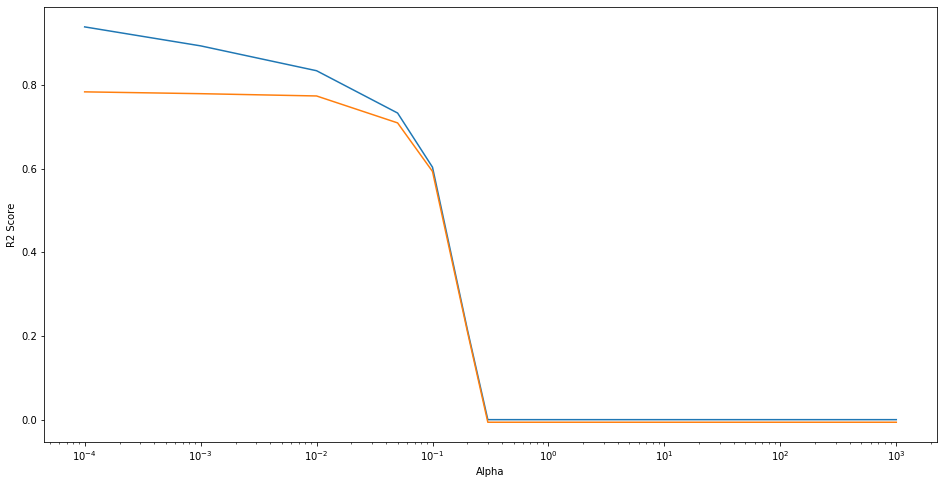

In [144]:
#graph for r2 score
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [145]:
#check for the best param
model_cv.best_params_

{'alpha': 0.0001}

In [146]:
#building the model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9308253548580829
0.8717611326504396


In [147]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.7),
 ('MSSubClass', -0.019),
 ('LotArea', 0.012),
 ('OverallQual', 0.044),
 ('OverallCond', 0.004),
 ('MasVnrArea', 0.018),
 ('BsmtFinSF1', 0.014),
 ('BsmtFinSF2', 0.015),
 ('BsmtUnfSF', 0.093),
 ('1stFlrSF', 0.107),
 ('2ndFlrSF', 0.018),
 ('LowQualFinSF', 0.02),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.017),
 ('FullBath', 0.014),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', -0.016),
 ('KitchenAbvGr', 0.015),
 ('TotRmsAbvGrd', 0.029),
 ('Fireplaces', 0.031),
 ('GarageCars', 0.02),
 ('GarageArea', 0.009),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.013),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.013),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.007),
 ('MiscVal', 0.005),
 ('MoSold', -0.063),
 ('YearBuilt_Age', -0.021),
 ('YearRemodAdd_Age', 0.014),
 ('GarageYrBlt_Age', 0.001),
 ('YrSold_Age', 0.217),
 ('MSZoning_FV', 0.187),
 ('MSZoning_RH', 0.201),
 ('MSZoning_RL', 0.161),
 ('MSZoning_RM', 0.022),
 ('LotShape_IR2', -0.037),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.10

In [148]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols = cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient']

In [149]:
lasso_coef['Coefficient']=lasso_coef['Coefficient'].apply(lambda x:abs(x))

In [150]:
#Extracting top 10 coefficient
lasso_coef.sort_values(by='Coefficient',ascending=False).head(6)

,Feature,Coefficient
0,const,10.700239
107,RoofMatl_WdShngl,1.286724
106,RoofMatl_WdShake,1.180355
101,RoofMatl_CompShg,1.157105
105,RoofMatl_Tar&Grv,1.085711
104,RoofMatl_Roll,1.065561


Above are the top 5 most important predictor variable